<a href="https://colab.research.google.com/github/tanyagupta1/Machine-Learning/blob/main/DL/pytorch/training_network_digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import torch
from torchvision import datasets,transforms

transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize([0.5],[0.5]),])
trainset = datasets.MNIST('MNIST_data/',download=True,train=True,transform=transform)
trainloader=torch.utils.data.DataLoader(trainset,batch_size=64,shuffle=True)

In [9]:
dataiter = iter(trainloader)
images,labels=dataiter.next()
print(type(images))
print(images.shape,labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28]) torch.Size([64])


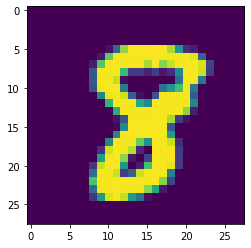

In [12]:
import matplotlib.pyplot as plt
plt.imshow(images[1].numpy().squeeze())

In [10]:
images=images.view(64,784)

In [12]:
def activation(x):
  return 1/(1+torch.exp(-x))
input_n=784
hidden_n=256
output_n=10
W1=torch.randn((input_n,hidden_n))
W2=torch.randn((hidden_n,output_n))
B1=torch.randn((1,hidden_n))
B2=torch.randn((1,output_n))
int1=activation(torch.matmul(images,W1)+B1)
ans = torch.matmul(int1,W2)+B2
print(ans.shape)

torch.Size([64, 10])


In [15]:
def softmax(x):
  return torch.exp(x)/torch.sum(torch.exp(x),dim=1).view(-1,1)
output=softmax(ans)
print(output.shape)
print(torch.sum(output,dim=1))

torch.Size([64, 10])
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000])


In [16]:
from torch import nn

In [21]:
import torch.nn.functional as F
class Network(nn.Module):
  def __init__(self):
    super().__init__()

    self.hidden=nn.Linear(784,256)
    self.output=nn.Linear(256,10)
    self.sigmoid=nn.Sigmoid()
    self.softmax=nn.Softmax(dim=1)

  def forward(self,x):
    x=self.hidden(x)
    x=self.sigmoid(x)
    x=self.output(x)
    x=self.softmax(x)
    return x

  def forward_way_2(self,x): #another way of forward pass
    x=F.sigmoid(self.hidden(x))
    x=F.softmax(self.output(x),dim=1)
    return x

In [22]:
model=Network()
model

Network(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
  (sigmoid): Sigmoid()
  (softmax): Softmax(dim=1)
)

In [26]:
class testNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    self.hidden_1=nn.Linear(784,128)
    self.hidden_2=nn.Linear(128,64)
    self.output=nn.Linear(64,10)
    self.relu=nn.ReLU()
    self.softmax=nn.Softmax(dim=1)

  def forward(self,x):
    x=self.hidden_1(x)
    x=self.relu(x)
    x=self.hidden_2(x)
    x=self.relu(x)
    x=self.output(x)
    x=self.softmax(x)
    return x

In [27]:
M=testNetwork()
x=M.forward(images)
print(x.shape)

torch.Size([64, 10])


In [28]:
print(x[0])

tensor([0.1104, 0.0890, 0.0883, 0.1047, 0.1000, 0.1069, 0.0777, 0.1226, 0.1029,
        0.0975], grad_fn=<SelectBackward>)


In [29]:
model=nn.Sequential(nn.Linear(784,128),
    nn.ReLU(),
    nn.Linear(128,64),
    nn.ReLU(),
    nn.Linear(64,10))
criterion=nn.CrossEntropyLoss()
images,labels=(iter(trainloader)).next()
images=images.view(images.shape[0],-1)
logits=model(images)
loss=criterion(logits,labels)
loss

tensor(2.3089, grad_fn=<NllLossBackward>)

In [34]:
model=nn.Sequential(nn.Linear(784,128),
    nn.ReLU(),
    nn.Linear(128,64),
    nn.ReLU(),
    nn.Linear(64,10),
    nn.LogSoftmax(dim=1))
criterion=nn.NLLLoss()

images,labels=(iter(trainloader)).next()
images=images.view(images.shape[0],-1)
logits=model(images)
loss=criterion(logits,labels)
loss

tensor(2.3087, grad_fn=<NllLossBackward>)

In [37]:
from torch import optim
model=nn.Sequential(nn.Linear(784,128),
    nn.ReLU(),
    nn.Linear(128,64),
    nn.ReLU(),
    nn.Linear(64,10),
    nn.LogSoftmax(dim=1))
criterion=nn.NLLLoss()
optimizer = optim.SGD(model.parameters(),lr=0.003)

In [39]:
epochs=5
for i in range(epochs):
  running_loss=0
  for images,labels in trainloader:
    images=images.view(images.shape[0],-1)
    optimizer.zero_grad()
    output=model.forward(images)
    loss=criterion(output,labels)
    loss.backward()
    optimizer.step()
    running_loss+=loss.item()
  else:
    print(running_loss/len(trainloader))


1.9466808527263242
0.8803921684718081
0.5248906143756309
0.4280760739244886
0.3838130761025303
